# **Case Study: Retail Store**

Let us resume the analysis that we started in the previous lecture.

First, we load and clean the data (again):

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Retail_Store.csv")
df.rename(columns={"Unnamed: 0": "Row_ID"}, inplace=True)
df.head()

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0       1  02/01/2016         2547               1          X52  0EM7L   
1       2  02/01/2016          822               2          2ML  68BRQ   
2       3  02/01/2016         3686               3          0H2  CZUZX   
3       4  02/01/2016         3719               4          0H2  549KK   
4       5  02/01/2016         9200               5          0H2  K8EHH   

   Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
0       1.0          3.13    11             Card  Circleville Store  
1       1.0          5.46    18             Card  Circleville Store  
2       1.0          6.35    17             Card  Circleville Store  
3       1.0          5.59    16             Cash  Circleville Store  
4       1.0          6.88    17             Cash  Circleville Store

In [3]:
df.loc[df['Transaction_Type'].isna(), 'Transaction_Type'] = 'Cash'
df.drop_duplicates(inplace=True)
df.drop(['Row_ID','Branch_Name'], axis=1, inplace=True)

In [4]:
df[df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1)]

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
18  02/01/2016         6450              14          N8U  4A2M0       1.0   
20  02/01/2016         6453              14          N8U  4A2M0       1.0   

    Sales_Amount  Hour Transaction_Type  
18          7.02     8             Cash  
20          7.02     8             Cash

In [5]:
df.drop([20], axis=0, inplace=True)

___________________
___________________

## Summary statistics

With pandas, it is easy to get summary statistics of the dataset:

In [6]:
# get a detailed summary of this data

df.describe()

# ** NOTE **
#
# DataFrame.describe()
#
#   For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 
#   50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. 
#   The 50 percentile is the same as the median.
#
#   For mixed data types provided via a DataFrame, the default is to return only an analysis 
#   of numeric columns.
#
# ** NOTE **

Customer_ID  Transaction_ID       Quantity   Sales_Amount  \
count  131706.000000   131706.000000  131706.000000  131706.000000   
mean    12386.450367    32389.604187       1.485311      11.981524   
std      6086.447552    18709.901238       3.872667      19.359699   
min         1.000000        1.000000       0.010000       0.020000   
25%      7349.000000    16134.000000       1.000000       4.230000   
50%     13496.000000    32620.000000       1.000000       6.920000   
75%     17306.000000    48548.000000       1.000000      12.330000   
max     22625.000000    64682.000000     400.000000     707.730000   

                Hour  
count  131706.000000  
mean       14.231090  
std         3.257412  
min         8.000000  
25%        11.000000  
50%        15.000000  
75%        17.000000  
max        20.000000

**count**: count number of non-NA/null observations. All columns have 131706 rows, so there are no missing fields.

For each column, we get a summary of how the data are distributed: **mean**, **std** (standard deviation), **min**, **max**, **quartiles** and **median** (the 50 percentile).

* **Q1:** What do we observe?

* **Q2:** Is the summary meaningfull for all columns of our dataframe?

* **Q3:** Should we group rows somehow?

In [7]:
# We group sales by transaction
# agg applies the specified function to all values of a group
# you can choose different functions for different columns

df.groupby('Transaction_ID').agg({'Sales_Amount':'sum', 'Quantity': 'sum', 'Hour': 'max'}).describe()

Sales_Amount      Quantity          Hour
count  64682.000000  64682.000000  64682.000000
mean      24.396874      3.024403     14.217495
std       38.613117      6.298796      3.261210
min        0.030000      0.100000      8.000000
25%        6.360000      1.000000     11.000000
50%       12.210000      2.000000     15.000000
75%       25.180000      3.000000     17.000000
max      707.730000    408.000000     20.000000

In [8]:
# ** NOTE **
#
# For object data (e.g. strings or timestamps), the result’s index will include count, unique, 
# top, and freq. The top is the most common value. The freq is the most common value’s frequency. 
# Timestamps also include the first and last items.
#
# ** NOTE **

df[['SKU','SKU_Category','Transaction_Type']].describe()

SKU SKU_Category Transaction_Type
count   131706       131706           131706
unique    5242          187                2
top      UNJKW          N8U             Card
freq      2007        10913            84905

* The **top** is the most common value. 

* The **freq** is the most common value’s frequency.

___________________
___________________

## Visualizing sales data

First, let us focus on sales to answer questions such as:

* **Q1:** What is the distribution of sales over time?

* **Q2:** Which is the most profitable month of the year?

* **Q3:** Which is the day of the week preferred by our customers?

* **Q4:** Which is the quarter with the higest volume of sales?

* **Q5:** How do we analyse sales amounts by quarter, month, week, and day?

### **Checking Data Types**

When you load data into pandas the system assigns a data type to each column.

In some cases, making sure that pandas (or whatever tool you want to use) understood what a feature represents makes the analysis *a lot* easier.
One such example are **dates**.

In [9]:
#
# dtypes gives as output the data type of each column
#

df.dtypes

Date                 object
Customer_ID           int64
Transaction_ID        int64
SKU_Category         object
SKU                  object
Quantity            float64
Sales_Amount        float64
Hour                  int64
Transaction_Type     object
dtype: object

> The ***object*** data type is used to handle text or mixed numeric and non-numeric values

In [10]:
# Let's change the Date column, we set it to DateTime.

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.dtypes

Date                datetime64[ns]
Customer_ID                  int64
Transaction_ID               int64
SKU_Category                object
SKU                         object
Quantity                   float64
Sales_Amount               float64
Hour                         int64
Transaction_Type            object
dtype: object

In [11]:
df.head()

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
0 2016-01-02         2547               1          X52  0EM7L       1.0   
1 2016-01-02          822               2          2ML  68BRQ       1.0   
2 2016-01-02         3686               3          0H2  CZUZX       1.0   
3 2016-01-02         3719               4          0H2  549KK       1.0   
4 2016-01-02         9200               5          0H2  K8EHH       1.0   

   Sales_Amount  Hour Transaction_Type  
0          3.13    11             Card  
1          5.46    18             Card  
2          6.35    17             Card  
3          5.59    16             Cash  
4          6.88    17             Cash

Now that the Date column is of type datetime, we can deal with dates much more easily:

In [12]:
df.sort_values(by=['Date','Hour'], inplace=True) # sort by date and hour

In [13]:
df.head()

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
18  2016-01-02         6450              14          N8U  4A2M0       1.0   
101 2016-01-02         8537              63          AEB  4EKR9       2.0   
102 2016-01-02         8537              63          AEB  9FTYM       1.0   
103 2016-01-02         8537              63          FZT  ZP7RI       1.0   
104 2016-01-02         8537              63          JPI  MKV69       1.0   

     Sales_Amount  Hour Transaction_Type  
18           7.02     8             Cash  
101         17.17     8             Cash  
102          9.07     8             Cash  
103          4.09     8             Cash  
104          1.58     8             Cash

In [14]:
print(df['Date'][0]) # this is the first date in the dataset
print(df['Date'].dt.month[0]) # this is the month (January)
print(df['Date'].dt.dayofweek[0]) # this is the day of the week (saturday)

2016-01-02 00:00:00
1
5


### **Plotting Sales Data**

To visualize the distribution over time, we first add a few columns to the dataset:

In [15]:
# month
df['Month']= df['Date'].dt.month

# day of the week 
df['Day of Week']= df['Date'].dt.dayofweek 

df.head()

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
18  2016-01-02         6450              14          N8U  4A2M0       1.0   
101 2016-01-02         8537              63          AEB  4EKR9       2.0   
102 2016-01-02         8537              63          AEB  9FTYM       1.0   
103 2016-01-02         8537              63          FZT  ZP7RI       1.0   
104 2016-01-02         8537              63          JPI  MKV69       1.0   

     Sales_Amount  Hour Transaction_Type  Month  Day of Week  
18           7.02     8             Cash      1            5  
101         17.17     8             Cash      1            5  
102          9.07     8             Cash      1            5  
103          4.09     8             Cash      1            5  
104          1.58     8             Cash      1            5

Let us plot the total sales for each month:

In [16]:
# We create a group for each plot: Quarter, Month, Week, and Day

sales_by_month = df.groupby(['Month'], as_index=False).agg({'Sales_Amount':'sum'})

# ** NOTE **
#
# as_index=False
#
#     The groupby operation will not use the group as index for the new dataframe.
#
#     Below there are two example to clarify the difference.    
#
# ** NOTE **

In [17]:
sales_by_month

Month  Sales_Amount
0       1     111200.28
1       2     122114.61
2       3     127924.54
3       4     138172.11
4       5     142719.86
5       6     131305.35
6       7     120591.97
7       8     116908.98
8       9     141239.89
9      10     140853.51
10     11     132883.33
11     12     152124.19


* **Question:** Do we need to group sales by transaction? Why?

Now we can easily plot the distribution using the two columns of sales_by_month:

Text(0.5, 1.0, 'Sales by month')

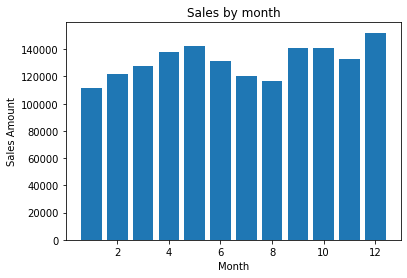

In [18]:
import matplotlib.pyplot as plt

plt.bar(x=sales_by_month['Month'], height=sales_by_month['Sales_Amount'])
plt.xlabel('Month') # Add an x-label to the axes.
plt.ylabel('Sales Amount') # Add a y-label to the axes.
plt.title("Sales by month") # Add a title to the axes.

### Exercise

- Plot the distribution of sales by:
    - day of the week
    - week of the year
    - quarter

- Repeat, but for the number of transactions

- Analyze the plots and discuss what are the best and worst quarters, months and days of the week

- Find the 5 weeks with the highest volume of sales and try to guess why these weeks perform so well


In [19]:
# The code goes here!

### Exercise

- Group the records by transaction and, for each group, find the hour of that transaction; make these groups into a new dataframe named trs having two columns: "Transaction_ID" and "Hour"

- Group the records in trs by hour and, for each hour, count the number of transactions; make these groups into a new dataframe named trs_hour having two columns: "Hour" and "N. Transactions"

- Plot the number of transactions per hour of the day

- Analyze the plot, find the peak hours and discuss the relevance of this findings

In [20]:
# The code goes here!

___________________
___________________

## Correlation analysis

It is often informative to know whether different attributes (columns) correlate with each other.

This is a first step towards finding **explanations** for patterns in the data and, possibly, learning how to make **informed (business) decisions** and develop **data-driven strategies**.

However, always keep in mind that **correlation is NON causation**: https://www.tylervigen.com/spurious-correlations

### Visualizing *vs.* measuring correlation 

To get an idea of whether two variables are correlated, you can start with a nice plot:

* if the two variables $X$ and $Y$ both "depend" on some variable $T$, you can plot both $X$ and $Y$ *against* $T$ and see if the two plots are *sufficiently similar*
* if the two variables $X$ and $Y$ are two attributes of a set of records (i.e., $X_i$ and $Y_i$ are the values of $X$ and $Y$ for record $i$), you can plot them *against each other*

However, a more rigorous approach consists in using a suitable **correlation measure**.

The most famous and widely used is **Pearson's correlation coefficient**, defined as the covariance of $X$ and $Y$, over the product of their standard deviations:

$$\rho_{X,Y} = \frac{\mathrm{cov}(X,Y)}{\sigma_X \sigma_Y}$$

Pearson's correlation is
* between −1 and +1, with $\rho_{X,Y}=+1,-1$ meaning that the data points lie exactly on a line
* symmetric, i.e. $\rho_{X,Y} = \rho_{Y,X}$
* invariant under both scaling, i.e. multiplying all elements by a nonzero constant, and adding any constant: $\rho_{X,Y} = \rho_{X, a*Y+b}$


### Exercise

Compare the analysis we performed for the sales amount and for the number of transactions, and answer the following questions:
* Is the distribution of transactions over time "similar" to the distribution of sales?
* Is that something we should have expected?
* How can we investigate this relation?


### **Sales Amounts VS Transactions**

We compare the number of transactions against the sales amount over the same time frame.

In [21]:
# We group by month and, for each group, we take:
# - the number of unique transactions
# - the sum of all sales amounts

trs_sales_month = df.groupby('Month', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})
trs_sales_month.rename(columns={'Transaction_ID':'N. Transactions'}, inplace=True)

In [22]:
trs_sales_month

Month  N. Transactions  Sales_Amount
0       1             4845     111200.28
1       2             4983     122114.61
2       3             5490     127924.54
3       4             5744     138172.11
4       5             6134     142719.86
5       6             5213     131305.35
6       7             4673     120591.97
7       8             4648     116908.98
8       9             5732     141239.89
9      10             5668     140853.51
10     11             5463     132883.33
11     12             6089     152124.19

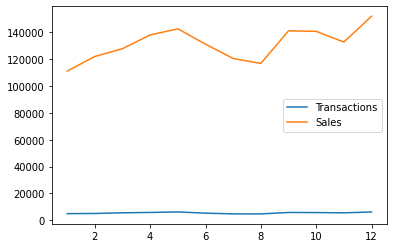

In [23]:
import matplotlib.pyplot as plt

# plot both variables' evolution over time

plt.plot(trs_sales_month['Month'],trs_sales_month['N. Transactions'], label='Transactions')
plt.plot(trs_sales_month['Month'],trs_sales_month['Sales_Amount'], label='Sales')
plt.legend()

The plot looks better if both variables are **normalized** (why?), i.e., expressed as a ratio of the total, rather than absolute values.

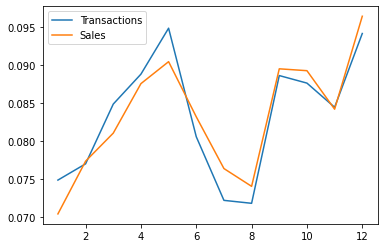

In [24]:
plt.plot(trs_sales_month['Month'],trs_sales_month['N. Transactions']/trs_sales_month['N. Transactions'].sum(), label='Transactions')
plt.plot(trs_sales_month['Month'],trs_sales_month['Sales_Amount']/trs_sales_month['Sales_Amount'].sum(), label='Sales')
plt.legend()

An alternative visualization is a scatterplot of the two features against each other:

Text(0.5, 1.0, 'Month')

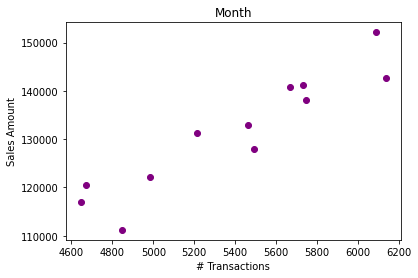

In [25]:
plt.scatter(x=trs_sales_month['N. Transactions'], y=trs_sales_month['Sales_Amount'], color='purple')
plt.xlabel('# Transactions')
plt.ylabel('Sales Amount')
plt.title("Month")

Often, you might want to include a **linear regression** in the plot, i.e., the line that better approximates your plot.

<AxesSubplot:xlabel='N. Transactions', ylabel='Sales_Amount'>

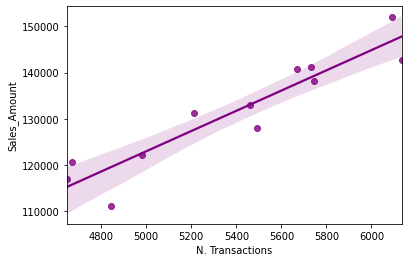

In [26]:
# seaborn is a nice plotting library, we will see it again in the following lectures
import seaborn as sns

# trs_sale_fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sns.regplot(x=trs_sales_month['N. Transactions'], y=trs_sales_month['Sales_Amount'], color='purple')
# seaborn returns an axis that we can use to modify the labels, title, etc.
# ax.set_xlabel('# Transactions')
# ax.set_ylabel('Sales Amount')
# ax.set_title("Month")

# plt.gcf().show()

Finally, we can **measure** correlation:

In [27]:
# measure correlation

rho_m = trs_sales_month['N. Transactions'].corr(trs_sales_month['Sales_Amount'])
print(f'month correlation: {rho_m}')


month correlation: 0.9319395181861823


### Exercise

- Repeat the analysis for:
    - day of the week
    - week of the year
    - quarter

In [28]:
# The code goes here!

---
---

## Characterizing statistical distributions: skewness, boxplots, quartiles, percentiles, outliers

### **Sales Amount Distribution**

So far, we focused on the *temporal* distribution of sales, now we want to study their **statistical** distribution:

* **Q1:** Which is the distribution of the amount spent per single transaction?

* **Q2:** How much do custumers spend when they visit the store?


In [29]:
# We compute the amount of each transaction

sales_amount = df.groupby('Transaction_ID', as_index=False).agg({'Sales_Amount':'sum'})
sales_amount.head(3)

Transaction_ID  Sales_Amount
0               1          3.13
1               2          5.46
2               3          6.35

In [30]:
# Check the size of the dataframe

sales_amount.shape

(64682, 2)

In [31]:
sales_amount[['Sales_Amount']].describe()

Sales_Amount
count  64682.000000
mean      24.396874
std       38.613117
min        0.030000
25%        6.360000
50%       12.210000
75%       25.180000
max      707.730000

How do we visualize the distribution?

(array([1.31644797e-02, 6.60397638e-04, 1.77169198e-04, 7.68971117e-05,
        3.14579093e-05, 1.22336314e-05, 4.80606948e-06, 1.74766163e-06,
        2.18457704e-07, 8.73830815e-07]),
 array([3.0000e-02, 7.0800e+01, 1.4157e+02, 2.1234e+02, 2.8311e+02,
        3.5388e+02, 4.2465e+02, 4.9542e+02, 5.6619e+02, 6.3696e+02,
        7.0773e+02]),
 <BarContainer object of 10 artists>)

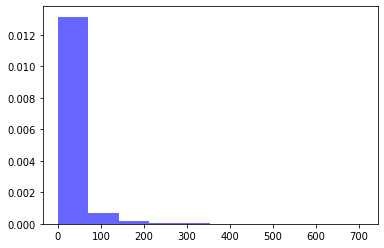

In [32]:
num_bins = 10
plt.hist(sales_amount['Sales_Amount'], num_bins, density=True, color='blue', alpha=0.6)

# ** NOTE **
#
# density: bool, default: False
#     If True, draw and return a probability density
#
# alpha: The parameter alpha is used to adjust the transparency of a graph plot.
#
# ** NOTE **

(array([4.13999194e-02, 3.78172131e-02, 1.98097446e-02, 1.09971608e-02,
        7.03870721e-03, 4.77985456e-03, 3.41886306e-03, 2.54503225e-03,
        2.13214719e-03, 1.70615467e-03, 1.20151737e-03, 1.03330494e-03,
        9.45921857e-04, 7.09987537e-04, 6.48819380e-04, 5.52697990e-04,
        5.09006450e-04, 3.60455211e-04, 3.38609441e-04, 3.03656208e-04,
        2.38118897e-04, 2.64333822e-04, 1.87873625e-04, 1.37628353e-04,
        1.70397009e-04, 1.52920393e-04, 1.81319894e-04, 1.61658701e-04,
        1.46366661e-04, 1.31074622e-04, 1.26705468e-04, 1.02675121e-04,
        1.00490544e-04, 8.95676585e-05, 8.30139274e-05, 4.80606948e-05,
        6.11681570e-05, 5.02452719e-05, 5.67990030e-05, 5.02452719e-05,
        2.83995015e-05, 4.36915407e-05, 3.93223867e-05, 4.36915407e-05,
        3.05840785e-05, 2.83995015e-05, 3.05840785e-05, 2.18457704e-05,
        2.18457704e-05, 2.62149244e-05, 2.18457704e-05, 1.96611933e-05,
        1.52920393e-05, 6.55373111e-06, 1.09228852e-05, 6.553731

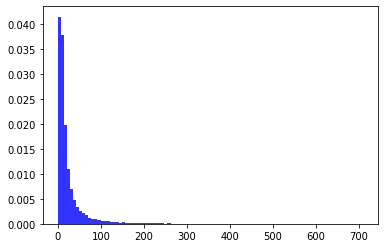

In [33]:
# plot again with more bins

num_bins = 100
plt.hist(sales_amount['Sales_Amount'], num_bins, density=True, color='blue', alpha=0.8)


### Questions

* What do you notice from the plot?
    
    * Is the distribution symmetric?
    * Where are most of the values concentrated?

### Skewness

The skewness measures *how asymmetric* a statistical distribution is.

In [34]:
from scipy.stats import skew

print( f"skewness:\t{skew(sales_amount['Sales_Amount'])}" )
print( f"mode:\t{sales_amount['Sales_Amount'].mode()[0]}" )
print( f"median:\t{sales_amount['Sales_Amount'].median()}" )
print( f"mean:\t{sales_amount['Sales_Amount'].mean()}" )

skewness:	4.88033296345249
mode:	6.75
median:	12.21
mean:	24.396874246312727


* Right/Positive skewed distribution, with a long tail.

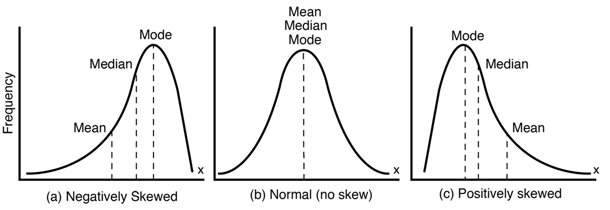

### Percentiles and quartiles ###

* saying that a value $x$ lies in the $m$th percentile means that $m\%$ of the values for that attribute fall at or below $x$
* quartiles are percentiles for $m=25,50,75$, which correspond to cutting the range of observed values into 4 equally likely intervals


  ![](Percentiles.png)

{'whiskers': [<matplotlib.lines.Line2D at 0x12db27af0>,
 'caps': [<matplotlib.lines.Line2D at 0x12db36250>,
 'boxes': [<matplotlib.lines.Line2D at 0x12db27760>],
 'medians': [<matplotlib.lines.Line2D at 0x12db36970>],
 'fliers': [<matplotlib.lines.Line2D at 0x12db36d00>],
 'means': []}

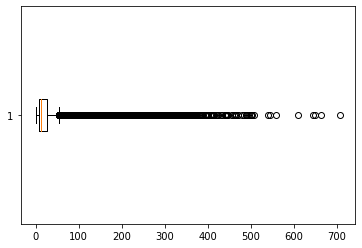

In [35]:
# Let's visualize it with another kind of plot

plt.boxplot(sales_amount['Sales_Amount'],  vert=False)

# ** NOTE **
#
# vert bool, default: True
#     If True, draws vertical boxes. If False, draw horizontal boxes.
#
# ** NOTE **

* The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. 

* The whiskers extend from the box by 1.5x the inter-quartile range (IQR). 
    * IQR = Q3 - Q1 

* Flier points (outliers) are those past the end of the whiskers.
    * An outlier is a point or set of data points that lie away from the rest of the data values of the dataset.

```
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```

![](Boxplot.png)

### Exercise (difficult)

The shape of the distribution suggest that sales amounts follow a power law: the frequency of an event decreases as an inverse power of the "magnitude" of that event, i.e., the number of transactions of amount $x$ is roughly proportional to $x^{-a}$, for some $a$.

How can we further investigate this relation?

* Try to plot the distribution in a log-log scale: if $y = x^{-a}$, then $\log y = -a \log x$ is a **line**

* Try to plot, in a log-log scale, the empirical CCDF of the data, rather than the empirical PDF

    



In [36]:
# The code goes here!

### **Exercise**

* What do you think is more important for the store, small or large transactions?

* Which transactions generate the most revenue?




In [37]:
# The code goes here!

### **Outliers**

An outlier is a point or set of data points that lie *away* from the rest of the data values of the dataset. 

**Q1:** How do we check if our data contain outliers?

**Q2:** How do we identify outliers?

**Q3:** How do we treat outliers? 

**Q4:** Why is important to look for outliers?
 

### **Q1:** How do we check if our data contain outliers?


The boxplot already marks outliers:

* In the boxplot, all points greater than Q3+1.5*IQR are considered outliers.

### **Q2:** How do we identify outliers?

You can use different methods to identify outliers based on the distribution of the data. Here we outline 3 main approaches


* **IQR** (Inter Quartile Range)
  
  * Data points falling below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

  * It can be applied to skewed distributions.

* **Percentile-based** approach

  * Data points above 99th-95th percentile and below 1st-5th percentile are considered outliers.

* **Z-score**
    * If the data are assumed to be roughly normally distributed, data points falling below $\mu-3\sigma$ or above $\mu+3\sigma$ are outliers.
    * The **standardized value** $z_i$ of a data point $x_i$ is $z_i = \frac{x_i - \mu(x)}{\sigma(x)}$
        * it measures distance from the mean $x_i$ in terms of *number of standard deviations* 
        * in terms of $z$, the outliers are the values below -3 or above +3

### **Q3:** How do we treat outliers? 

The two main approaches are *trimming* and *capping*:

* **Trimming**: We exclude outliers from our analysis, we remove them from our dataset. 

  * By applying this technique we reduce the size of our dataset.

* **Capping**: We cap our outliers data. We set a min and max value and outliers are modified to be inside the new range.

  * Outliers below the min take the min value, outliers above the max take the max value.



Since the distribution of sales amounts is clearly **non-Guassian**, we exclude the z-score.

* We use the **IQR**.
* We trim all values above Q3 + 1.5 IQR.

In [38]:
import numpy as np

# we create a copy of the data so that we can trim values but keep the original
sales = sales_amount['Sales_Amount'].copy()

Q1 = sales.quantile(0.25)
Q3 = sales.quantile(0.75)
IQR = Q3 - Q1
upper = (Q3+1.5*IQR)
sales = sales[sales<=upper]

We plot our the trimmed data:

Text(0.5, 1.0, 'Sales amount')

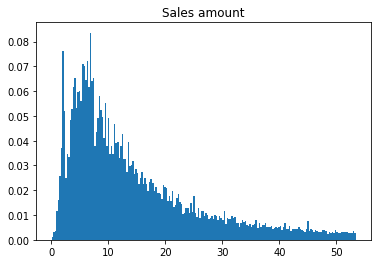

In [39]:
nBins = 200
plt.hist(sales, nBins,  density=True)
plt.title('Sales amount')

Text(0.5, 1.0, 'Sales amount')

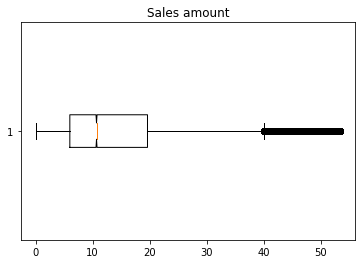

In [40]:
plt.boxplot(sales, nBins, vert=False)
plt.title('Sales amount')

### Exercise

* Repeat the previous analysis, considering the quantity of items per transaction rather than the total amount.
* Try to use percentiles to identify the outliers
* Try to cap the outliers rather than trimming them

In [41]:
# The code goes here!